In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras import optimizers
import time


In [347]:
def creat_dataset(dataset, look_back=1):  # look_back表示用当前项的前look_back项预测当前1项
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)


In [348]:
dataframe = pd.read_csv('bitcoin2020.csv')
dataframe

,Close,Timestamp,High,Low,Open
0,28650.166249,1609430400,28813.590185,28626.723157,28774.071184
1,28634.955332,1609431300,28732.627836,28564.100414,28649.166278
2,28463.313750,1609432200,28681.998007,28463.313750,28645.891128
3,28384.280723,1609433100,28559.132322,28315.100000,28475.530204
4,28566.108762,1609434000,28566.108762,28375.256962,28375.447293
...,...,...,...,...,...
17372,34354.164427,1625065200,34623.021577,34170.967936,34592.105918
17373,34300.000000,1625066100,34365.355328,34168.270400,34347.000000
17374,34162.600444,1625067000,34351.545530,34153.266013,34293.792362
17375,34196.414584,1625067900,34299.000000,34082.400478,34169.499925


In [349]:
dataframe = dataframe.iloc[:,[1,0]]

In [350]:
dataframe

,Timestamp,Close
0,1609430400,28650.166249
1,1609431300,28634.955332
2,1609432200,28463.313750
3,1609433100,28384.280723
4,1609434000,28566.108762
...,...,...
17372,1625065200,34354.164427
17373,1625066100,34300.000000
17374,1625067000,34162.600444
17375,1625067900,34196.414584


In [351]:
dataset = dataframe.values
dataset

array([[1.60943040e+09, 2.86501662e+04],
       [1.60943130e+09, 2.86349553e+04],
       [1.60943220e+09, 2.84633138e+04],
       ...,
       [1.62506700e+09, 3.41626004e+04],
       [1.62506790e+09, 3.41964146e+04],
       [1.62506880e+09, 3.42066893e+04]])

In [352]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset[:,1].reshape(-1, 1))
# 时间序列不需要显式的时间标签，只需要一个数值组成的序列即可

In [353]:
dataset

array([[0.00731868],
       [0.00689999],
       [0.00217544],
       ...,
       [0.15905219],
       [0.15998295],
       [0.16026577]])

In [354]:
train_size = int(len(dataset)*0.85)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

In [355]:
look_back = 10
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)

In [356]:
trainX.shape  # 第一个是样本总数，第二个是每一个样本中的时间序列的长度，第三个是每一个时间序列中的每一个元素的编码长度

(14760, 10, 1)

In [357]:
model = Sequential()

model.add(LSTM(100, input_shape=(trainX.shape[1],trainX.shape[2])))
#model.add(Dropout(0.2))

# model.add(LSTM(100, return_sequences=False))
# #model.add(Dropout(0.2))

# model.add(LSTM(200, return_sequences=True))
# #model.add(Dropout(0.2))

# model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 51,001
Trainable params: 51,001
Non-trainable params: 0
_________________________________________________________________


In [358]:
history = model.fit(trainX, trainY, batch_size=64, nb_epoch=10, 
                    validation_split=0.1, verbose=2)
print('compilatiom time:', time.time()-start)

Train on 13284 samples, validate on 1476 samples
Epoch 1/10
 - 5s - loss: 0.0129 - val_loss: 1.9429e-04
Epoch 2/10
 - 2s - loss: 0.0011 - val_loss: 2.5975e-04
Epoch 3/10
 - 2s - loss: 8.0680e-04 - val_loss: 1.9105e-04
Epoch 4/10
 - 2s - loss: 6.7393e-04 - val_loss: 2.1915e-04
Epoch 5/10
 - 2s - loss: 5.7297e-04 - val_loss: 1.8256e-04
Epoch 6/10
 - 2s - loss: 4.6455e-04 - val_loss: 2.9178e-04
Epoch 7/10
 - 3s - loss: 4.0776e-04 - val_loss: 1.5715e-04
Epoch 8/10
 - 2s - loss: 3.9965e-04 - val_loss: 1.5567e-04
Epoch 9/10
 - 2s - loss: 3.3701e-04 - val_loss: 1.6050e-04
Epoch 10/10
 - 3s - loss: 3.1422e-04 - val_loss: 1.5271e-04
compilatiom time: 26.384696006774902


In [359]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [360]:
trainPredict

array([[0.00685739],
       [0.00808263],
       [0.00981372],
       ...,
       [0.29234025],
       [0.2891301 ],
       [0.28558055]], dtype=float32)

In [361]:
trainY

array([[0.01026299],
       [0.01331601],
       [0.01147663],
       ...,
       [0.28635993],
       [0.28221371],
       [0.28478061]])

In [362]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [363]:
trainPredict.shape

(14760, 1)

In [364]:
trainY.shape

(14760, 1)

In [365]:
testPredict.shape

(2597, 1)

In [366]:
testY.shape

(2597, 1)

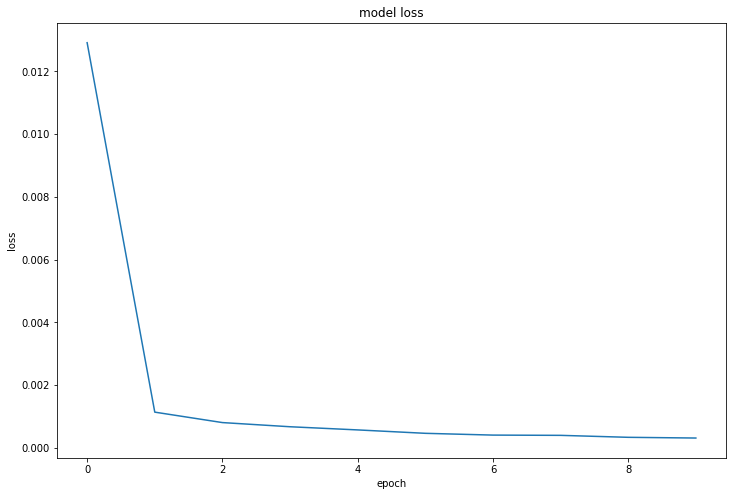

In [367]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [368]:
trainPredictPlot = np.zeros(shape=dataset.shape)
trainPredictPlot[:,:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
# 使用之前的look_back+1个的数据预测当前的1个数据，所以从第look_back+1个才开始预测
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict

In [369]:
testPredictPlot = np.zeros(shape=dataset.shape)
testPredictPlot[:,:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[(len(trainPredict)+look_back)+look_back: len(dataset), :] = testPredict

In [370]:
dataset

array([[0.00731868],
       [0.00689999],
       [0.00217544],
       ...,
       [0.15905219],
       [0.15998295],
       [0.16026577]])

In [371]:
dataset = scaler.inverse_transform(dataset)
dataset

array([[28650.16624938],
       [28634.9553323 ],
       [28463.31375029],
       ...,
       [34162.60044404],
       [34196.41458411],
       [34206.68928795]])

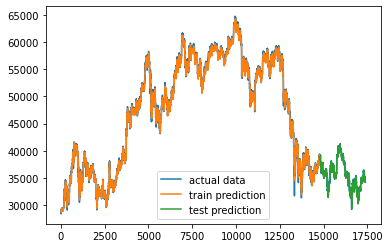

In [372]:
plt.plot(dataset,label = 'actual data')
plt.plot(trainPredictPlot,label = 'train prediction')
plt.plot(testPredictPlot,label = 'test prediction')
plt.legend()

In [373]:
# sum_t = 0
# testY = testY.reshape(-1,)
# testPredict = testPredict.reshape(-1,)
# print(testY.shape)
# print(testPredict.shape)
# for i in range(len(testY)):
#     testY[i] = testY[i] / (max(testY) - min(testY))
#     testPredict[i] = testPredict[i] / (max(testPredict) - min(testPredict))
# for i in range(len(testY)):
#     sum_t += (testPredict[i] - testY[i])**2
# rmse = (sum_t / len(testPredict))**0.5
# rmse

In [374]:
import numpy as np
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
#调用

# mean_absolute_error(testY,testPredict)
np.sqrt(mean_squared_error(testY,testPredict))  # RMSE就是对MSE开方即可



257.93264996674867

In [375]:
r2_score(testY,testPredict)

0.9883044134156568

In [376]:
#  MAPE和SMAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

#  调用
mape(testY, testPredict)


0.5260792763302496